In [1]:
import json
import numpy as np
import h5py
import tensorflow as tf
import os
import cPickle as pkl
#import ipdb
import numpy
import copy
import pprint
from Recognizer import MathFormulaRecognizer
import warnings
import sys
import math
import time
from util import *
from collections import OrderedDict

from data_iterator import dataIterator
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
home_path = os.getcwd()
checkpoint_path = os.path.join(home_path,'save')
max_iters = 100000
batch_size = 8
valid_batch_size = 2
finetune_encoder_after = -1
#Evaluation Checkpoint
nEvaImages = 300
EvaEach = 2500
SummaryEach = 1000
device = "/gpu:0"
batch_Imagesize=250000
valid_batch_Imagesize=250000
maxImagesize = 500000
maxlen = 200
n_epoch = 10000

In [3]:
model = MathFormulaRecognizer(num_label =112,dim_hidden=128,device = '/device:GPU:0')
words,alphas,beta= model.build_greedy_eval()
saver = tf.train.Saver(max_to_keep=10)
sess = tf.Session()
saved_path=tf.train.latest_checkpoint(checkpoint_path)
tf.reset_default_graph()
saver.restore(sess, saved_path)

In [4]:
datasets=['./data/offline-train.pkl',
'./data/train_caption.txt']
valid_datasets=['./data/offline-test.pkl',
'./data/test_caption.txt']
dictionaries=['./data/dictionary.txt']


worddicts = load_dict(dictionaries[0])
worddicts_r = [None] * len(worddicts)

for kk, vv in worddicts.iteritems():
        worddicts_r[vv] = kk
train,train_uid_list = dataIterator(datasets[0], datasets[1],
                         worddicts,
                         batch_size=batch_size, batch_Imagesize=batch_Imagesize,maxlen=maxlen,maxImagesize=maxImagesize)
valid,valid_uid_list = dataIterator(valid_datasets[0], valid_datasets[1],
                     worddicts,
                     batch_size=valid_batch_size, batch_Imagesize=valid_batch_Imagesize,maxlen=maxlen,maxImagesize=maxImagesize)


total words/phones 111
total  1779 batch data loaded
sentence 505_em_51 length bigger than 200 ignore
total  505 batch data loaded


In [18]:
ind = 500
valid = np.squeeze(valid)
train = np.squeeze(train)
x, x_mask, y, y_mask = prepare_data(valid[ind,0],valid[ind,1])
x = x[0:1,:,:,:]
x_mask = x_mask[0:1,:,:]
Words,Alphas,height,width,Beta= sess.run([words,alphas,model.feature_height,model.feature_width,beta],\
            feed_dict={model.x:x,model.x_mask:x_mask,model.is_train:False})

print(Words)

[array([40]), array([75]), array([57]), array([37]), array([110]), array([93]), array([83]), array([57]), array([90]), array([110]), array([57]), array([37]), array([110]), array([15]), array([75]), array([57]), array([65]), array([110]), array([34]), array([83]), array([57]), array([90]), array([110]), array([57]), array([37]), array([110]), array([34]), array([50]), array([34]), array([83]), array([57]), array([90]), array([110]), array([57]), array([107]), array([110]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array(

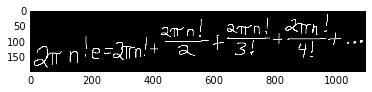

In [19]:
origin =np.squeeze(x[0])
plt.imshow(np.squeeze(origin),cmap='gray')

\sin


/home/menglin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


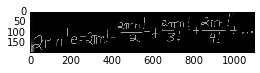

^


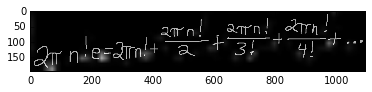

{


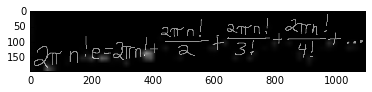

3


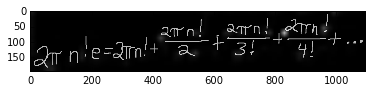

}


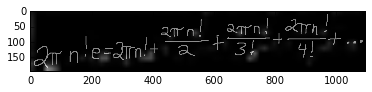

=


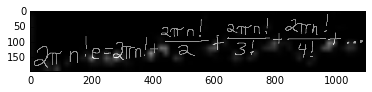

\frac


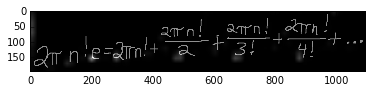

{


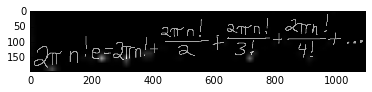

In [20]:
import scipy.misc as misc
import skimage
fig=plt.figure(figsize=(4, 8))
columns = 2
rows = 1

for i in range(0,8):
    fig.add_subplot(2, 1, 1)
    alphao =np.reshape(Alphas[i][0],[height,width])
    expanded = misc.imresize(alphao,(origin.shape[0],origin.shape[1]))
    expanded = expanded.astype(dtype = np.float32)
    expanded /= 256
    im = expanded + origin
    plt.imshow(np.squeeze(im),cmap='gray')
    print(worddicts_r[Words[i]])
    # fig.add_subplot(2, 1, 2)
    # im =np.reshape(Beta[2][0],[height,width])
    # plt.imshow(np.squeeze(im),cmap='gray')
    plt.show()


In [14]:
expanded.dtype

dtype('float32')